# Avocado Project

### Import Libraries

In [1]:
# Import libraries
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv('C:/Users/Dazzle/Desktop/DataTrained/avocado.csv/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Dataset is having numeric and categorical columns.

### Project Description

Avocado is a fruit consumed by people heavily in the United States. The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [3]:
# Checking columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Columns names are displayed where 'AveragePrice' and 'region' is the target variable in different approaches and all other are independent variables.

In [4]:
# Checking datatypes
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Datatypes of columns are numeric and categorical both.

In [5]:
#Checking the dataset shape
df.shape

(18249, 14)

Dataset is having 18249 rows and 14 columns (18249 input features and 14 output feature).

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We can see there is no null values in the dataset. Datatype seems appropriate except for Date hence data conversion is required here.

### Data Preprocessing

In [7]:
# Checking which all columns are relevant for model training
for i in df.columns :
    print(i)
    print('Unique values : ',df[i].nunique())
    #print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Unnamed: 0
Unique values :  53
----------------------
Date
Unique values :  169
----------------------
AveragePrice
Unique values :  259
----------------------
Total Volume
Unique values :  18237
----------------------
4046
Unique values :  17702
----------------------
4225
Unique values :  18103
----------------------
4770
Unique values :  12071
----------------------
Total Bags
Unique values :  18097
----------------------
Small Bags
Unique values :  17321
----------------------
Large Bags
Unique values :  15082
----------------------
XLarge Bags
Unique values :  5588
----------------------
type
Unique values :  2
----------------------
year
Unique values :  4
----------------------
region
Unique values :  54
----------------------


Unnamed: 0 column seems to have no relevance in the prediction hence we can drop the column and proceed ahead.

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Now we have 18249 rows and 13 columns in the dataset.

### Feature Engineering

In [9]:
# Creating a new feature month from exiting one i.e. Date
date=df['Date'].values
month=[m.split('-')[1] for m in date]
df['Month']=month
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,02
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,01
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,01
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,01


New column has been created in the dataset and now we have dataset with 18249 rows and 14 columns.

In [10]:
# Changing the datatype of Month column from object to integer
df['Month']=df['Month'].astype(int)
df['Month']

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Month, Length: 18249, dtype: int32

In [11]:
# Checking Datatype of all the 14 columns
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int32
dtype: object

### EDA and visualzatons

In [12]:
# Checking null values in dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

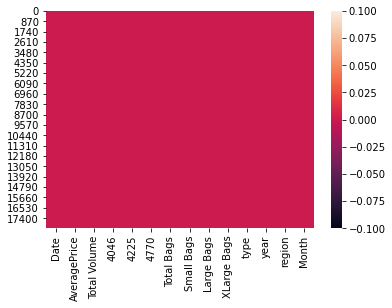

In [13]:
# Visualizing nulls
sns.heatmap(df.isnull())

Plot depicting that no null values are present in the dataset.

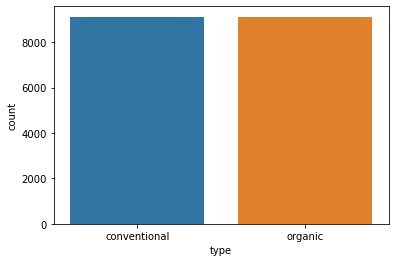

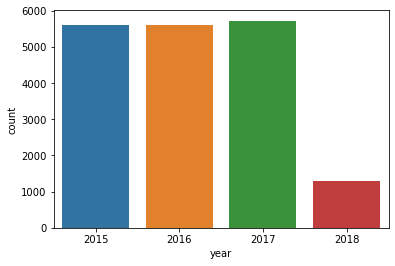

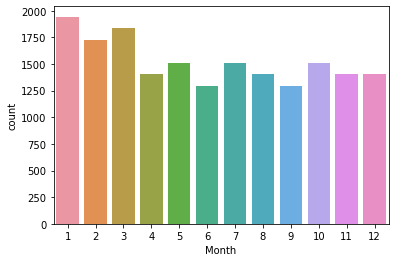

In [14]:
# Visualizing value counts of all the columns
#plt.figure(figsize=(10,8))
for i in df.columns :
    if (df[i].nunique()<15) :
        sns.countplot(df[i])
        plt.show()

Plot showing Avacado types sold have similar counts and Most avacados are consumed in 2017 and then in 2015 and 2016. Also least times avacados are consumed in 2018. From third diagram, we can see that Avacados are mostly consumed in first quarter.

In [15]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

Data showing count of conventional and organic type in each year. Count of both the types in a year is almost same.

In [16]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Data showing mean of average prices of all avacados sold in each year and we can see 2017 has the highest value price and 2018 has the lowest.

In [17]:
a=df[df['type']=='organic'].groupby('year')['AveragePrice']
print(a.sum(),'\n\n',a.mean())

year
2015    4697.02
2016    4413.29
2017    4963.59
2018    1015.53
Name: AveragePrice, dtype: float64 

 year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64


Above analysis shows that organic type avacados has highest total and average selling price in the year 2017 and then in 2015.

In [18]:
b=df[df['type']=='conventional'].groupby('year')['AveragePrice']
print(a.sum(),'\n\n',a.mean())

year
2015    4697.02
2016    4413.29
2017    4963.59
2018    1015.53
Name: AveragePrice, dtype: float64 

 year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64


Above analysis shows that conventional type avacados also have highest total and average selling price in the year 2017 and then in 2015.

In [19]:
df.groupby('region')['AveragePrice'].sum()

region
Albany                 527.63
Atlanta                452.23
BaltimoreWashington    518.57
Boise                  455.67
Boston                 517.44
BuffaloRochester       512.69
California             471.62
Charlotte              542.84
Chicago                526.19
CincinnatiDayton       408.71
Columbus               423.44
DallasFtWorth          366.93
Denver                 411.88
Detroit                431.32
GrandRapids            508.69
GreatLakes             452.43
HarrisburgScranton     511.49
HartfordSpringfield    614.70
Houston                354.20
Indianapolis           444.13
Jacksonville           510.70
LasVegas               466.75
LosAngeles             411.01
Louisville             434.90
MiamiFtLauderdale      482.83
Midsouth               474.81
Nashville              409.69
NewOrleansMobile       441.02
NewYork                583.92
Northeast              541.45
NorthernNewEngland     499.36
Orlando                509.10
Philadelphia           551.66
Pho

Region HartfordSpringfield has the highest total price of sold avacados.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

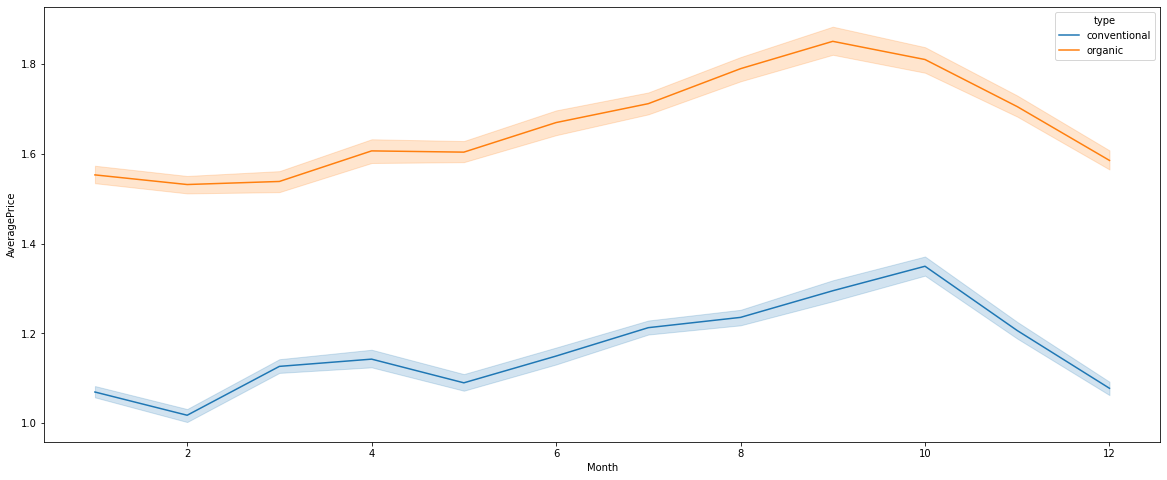

In [20]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)

From lineplot we can see the price vary more for conventional type avacados and there is a price hike from 8th to 10th motn for beth the types. Organc avacados are costlier than the conventional ones.

### Dividing dataset in continuous and categorical

In [21]:
df_con_=df.select_dtypes(exclude='object')
df_con_

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [22]:
df_con=df_con_.drop(['year','Month'],axis=1)
df_con

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [23]:
df_cat=df.select_dtypes(include='object')
df_cat

,Date,type,region
0,2015-12-27,conventional,Albany
1,2015-12-20,conventional,Albany
2,2015-12-13,conventional,Albany
3,2015-12-06,conventional,Albany
4,2015-11-29,conventional,Albany
...,...,...,...
18244,2018-02-04,organic,WestTexNewMexico
18245,2018-01-28,organic,WestTexNewMexico
18246,2018-01-21,organic,WestTexNewMexico
18247,2018-01-14,organic,WestTexNewMexico


In [24]:
df_cat_num=df[['year','Month']]
df_cat_num

,year,Month
0,2015,12
1,2015,12
2,2015,12
3,2015,12
4,2015,11
...,...,...
18244,2018,2
18245,2018,1
18246,2018,1
18247,2018,1


### Encode categorical columns

In [25]:
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

Date
['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-08-07' '2016-07-31' '2016-07-24'
 '201

In [26]:
from sklearn.preprocessing import LabelEncoder
df_cat_enc=df_cat.copy()
le=LabelEncoder()
for i in df_cat.columns :
    df_cat_enc[i]=le.fit_transform(df_cat_enc[i])
df_cat_enc

,Date,type,region
0,51,0,0
1,50,0,0
2,49,0,0
3,48,0,0
4,47,0,0
...,...,...,...
18244,161,1,53
18245,160,1,53
18246,159,1,53
18247,158,1,53


Categorical columns are now encoded.

### EDA and Visualizations 

In [27]:
# Describing categorical columns
df_cat_enc.describe()

,Date,type,region
count,18249.000000,18249.000000,18249.000000
mean,83.997096,0.499918,26.495644
std,48.787638,0.500014,15.583788
min,0.000000,0.000000,0.000000
25%,42.000000,0.000000,13.000000
50%,84.000000,0.000000,26.000000
75%,126.000000,1.000000,40.000000
max,168.000000,1.000000,53.000000


Above table is showing Date and region columns have high standard deviation i.e. data is spreaded.

For all the 3 columns, mean and median values are almost same implies data is normally distributed.

Difference between 75 percentile and max value is not much high implies it does not seem to have outliers.

In [28]:
# Describing continuous columns
df_con_.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


Above table shows high standard deviation also exponential in all columns except AveragePrice and year.

Mean and median (50 percentile) values are havng differences for few of the columns.

Difference between 75 percentile and max value is high implies it has outliers.

In [76]:
# Checking for outliers
from scipy.stats import zscore

z=np.abs(zscore(df_con_))
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [77]:
# Checking the outlier in the dataset
z[346][2]

3.199410614794124

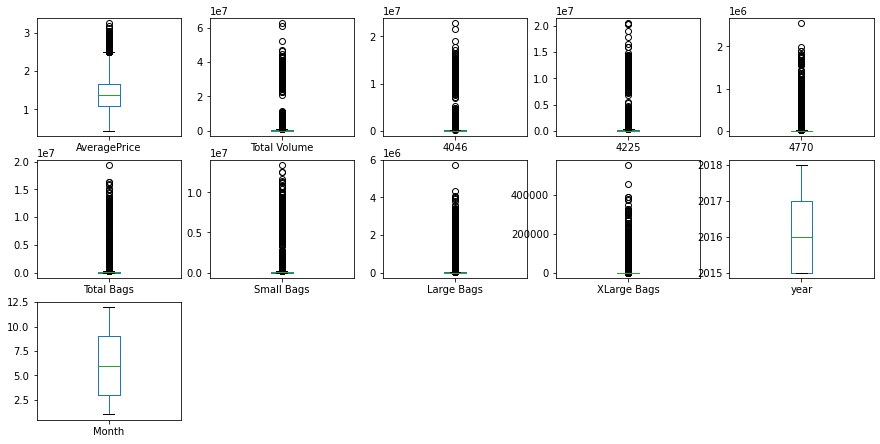

In [82]:
# Visualising outliers
df_con_.plot(kind='box',subplots=True,layout=(4,5), figsize=(15,10))
plt.show()

Plot showing there are presence of outliers in the columns.

In [83]:
# Checking skewness
df_con_.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

There is much skewness present in the continuous dataset.

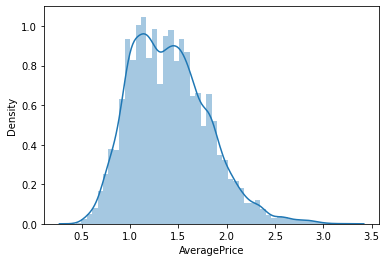

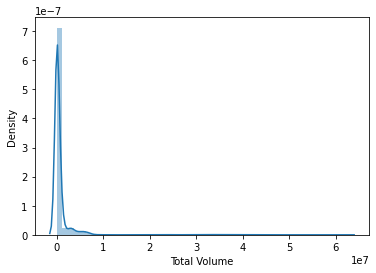

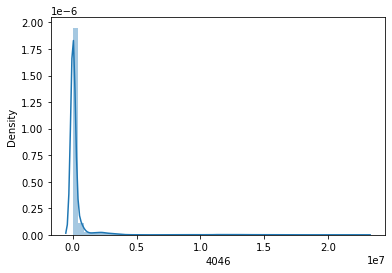

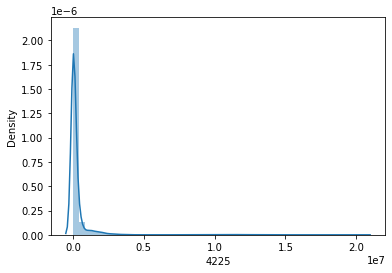

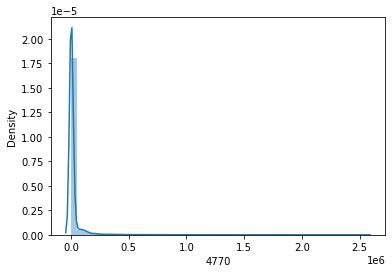

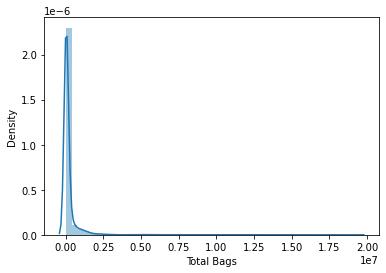

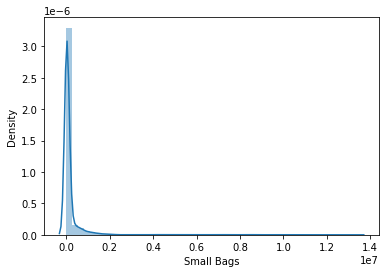

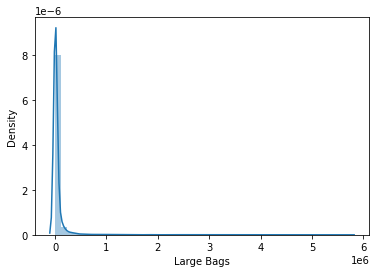

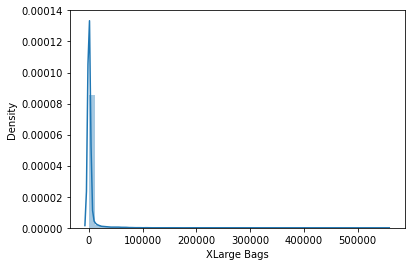

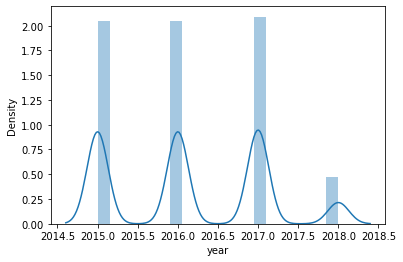

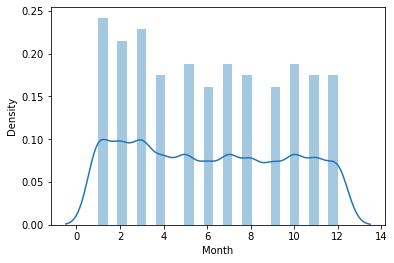

In [33]:
# Visualizing skewness
for i in df_con_.columns :
    sns.distplot(df_con_[i])
    plt.show()

Data is skewed in columns : 'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'

In [34]:
# Plotting Q-Q plot for showing gaussian distribution
def diagnostic_plot(df,col) :
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.show()

AveragePrice


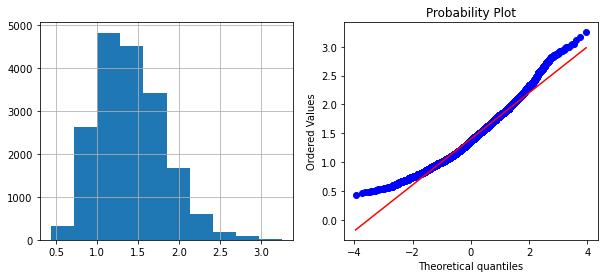

Total Volume


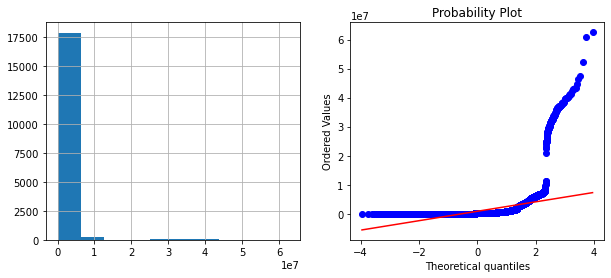

4046


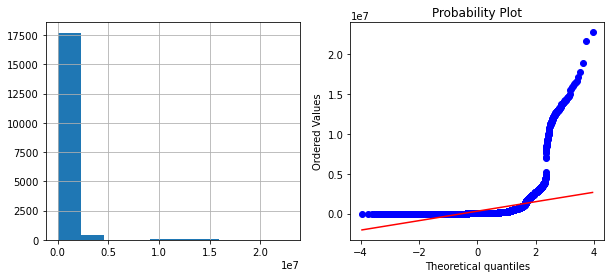

4225


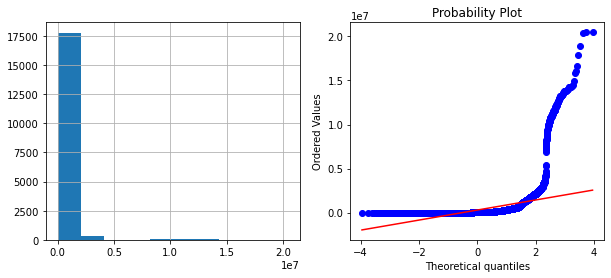

4770


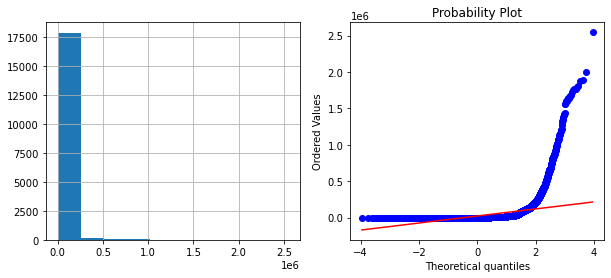

Total Bags


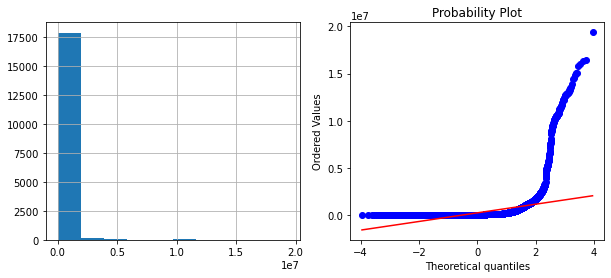

Small Bags


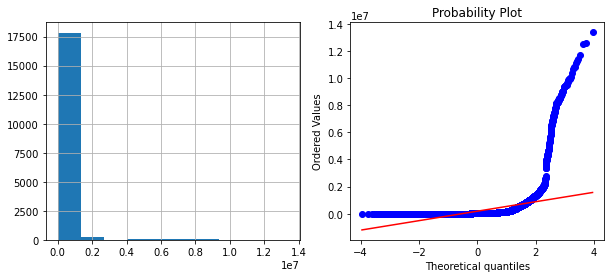

Large Bags


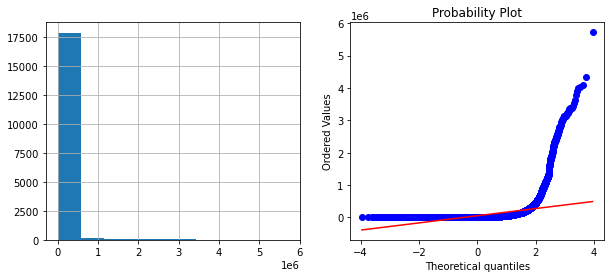

XLarge Bags


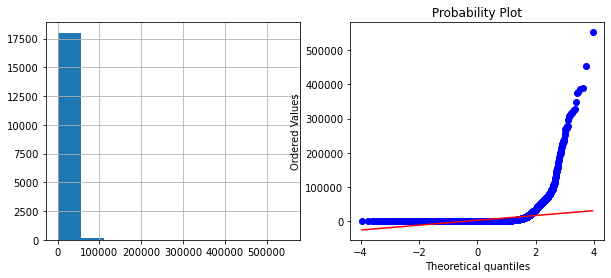

year


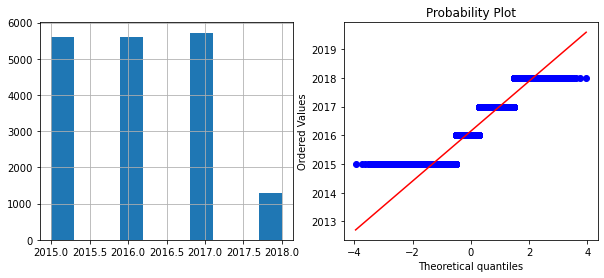

Month


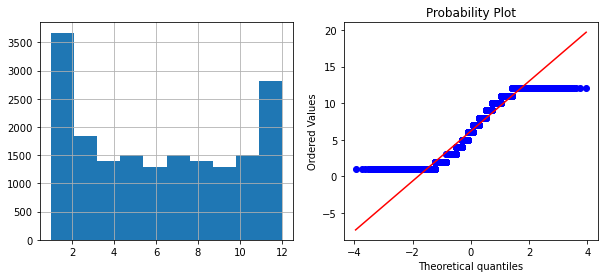

In [35]:
for i in df_con_.columns :
    print(i)
    diagnostic_plot(df_con_,i)

This Q-Q plot is showing Average price,Year,Month columns is normally distributed on histogram.
Remaning columns' data is not much varying in term of counts/numbers, so they are skewed data.

### Data Cleaning

In [88]:
# Removing outliers
df1=df_con_.copy()
df1=df_con_[(z<3).all(axis=1)]
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [89]:
# Printing shape of dataset before and after removing outliers
print('Shape of original dataset : ',df_con_.shape)
print('Shape of dataset after removing outliers : ',df1.shape)

Shape of original dataset :  (18249, 11)
Shape of dataset after removing outliers :  (17651, 11)


In [90]:
# Percentage Data lost
data_percent=(18249-17651)/18249 * 100
data_percent

3.276891884486821

Approx 3% data is lost after removing the outliers.

In [91]:
# Checking skewness after removing outliers
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

We can see skewness is reduced after removing outliers but still present in columns : 
'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'

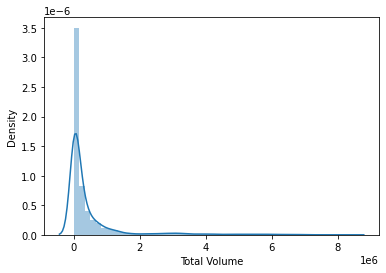

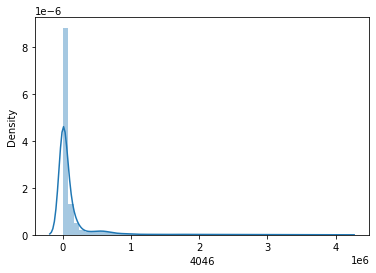

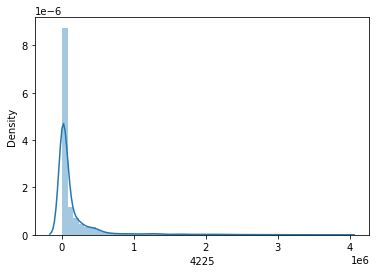

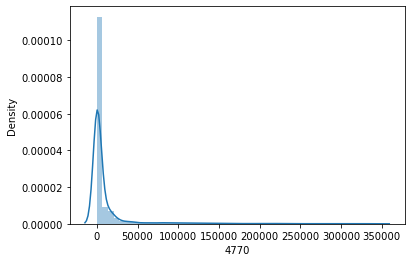

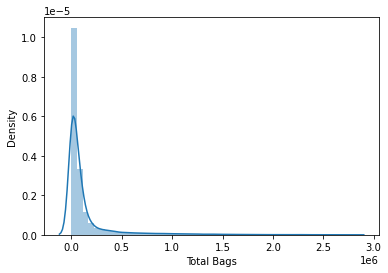

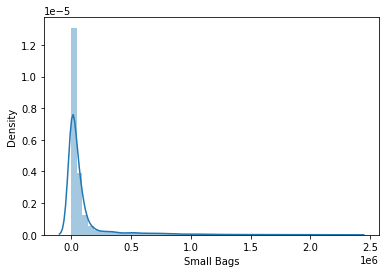

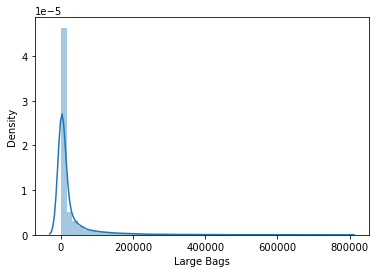

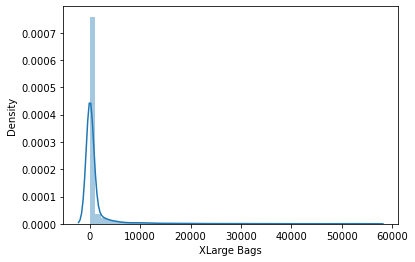

In [40]:
# Visualizng skewness
cols=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
df2=df1.copy()
for i in cols :
    sns.distplot(df2[i])
    plt.show()

In [92]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
power=pt.fit_transform(df1)
df2=pd.DataFrame(power,columns=df1.columns)
df2.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Month          -0.146554
dtype: float64

We can see skewness is completely removed from the columns but 'XLarge Bags' still has skewness

In [93]:
from scipy.stats import boxcox,yeojohnson
df2['XLarge Bags']=yeojohnson(df2['XLarge Bags'],0)
df2['XLarge Bags'].skew()

0.791966330495941

In [94]:
# Again removing skewness from XLarge Bags column
df2['XLarge Bags']=np.log(df2['XLarge Bags']+1)
df2.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.758075
year            0.227731
Month          -0.146554
dtype: float64

Considering the threshold of XLarge Bags as 0.7 due to the kind of data distributon as it can't be brought to the range of +/-0.5.

Total Volume


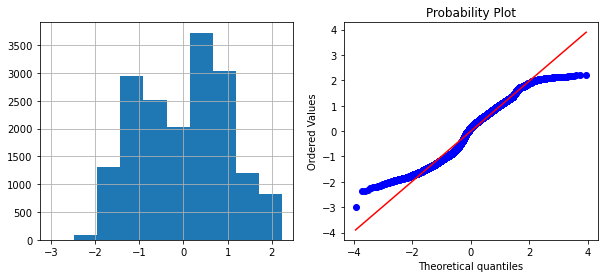

4046


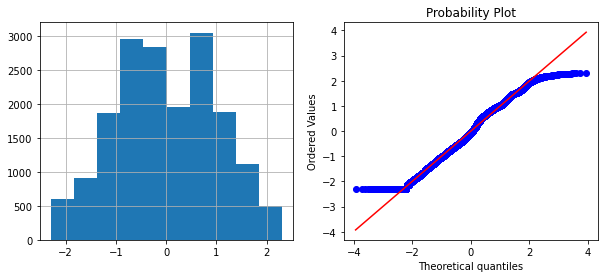

4225


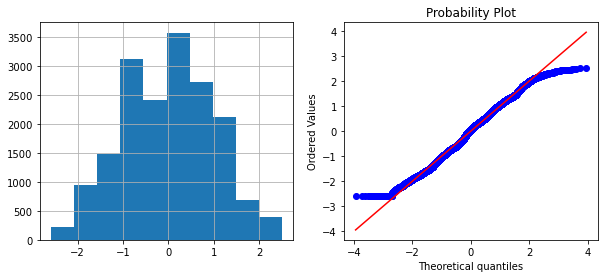

4770


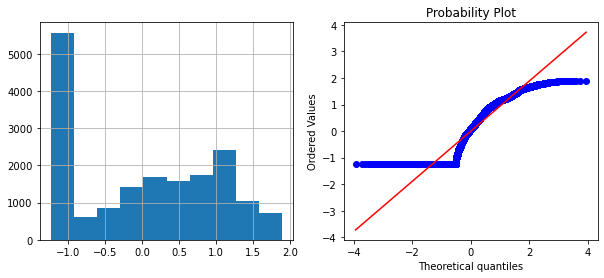

Total Bags


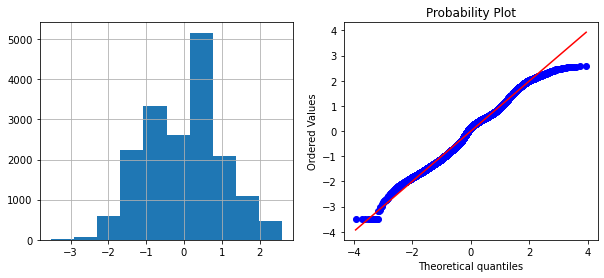

Small Bags


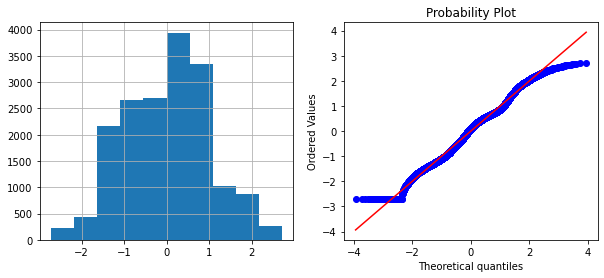

Large Bags


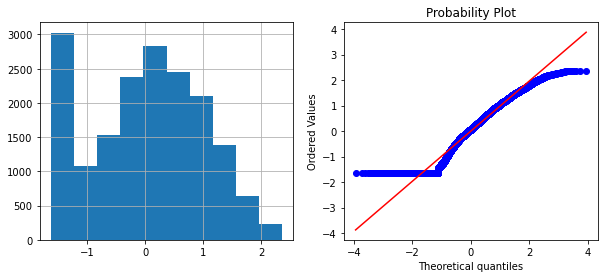

XLarge Bags


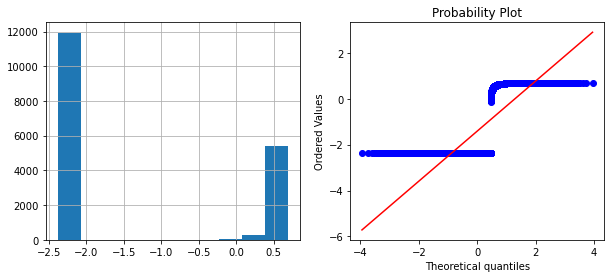

In [95]:
# Skewness visualisation with Q-Q Plot
for i in cols :
    print(i)
    diagnostic_plot(df2,i)

Data is now seem to be good fit on line implies skewness is reduced.

In [101]:
# Checking the distributon of data in XLarge Bags
df2['XLarge Bags'].value_counts()

-2.382779    11931
 0.265993       29
 0.396998       16
-0.087015       15
 0.349019       12
             ...  
 0.678253        1
 0.611106        1
 0.688654        1
 0.668030        1
 0.675141        1
Name: XLarge Bags, Length: 5118, dtype: int64

In [102]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-2.382779,-1.210647,1.491383
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-2.382779,-1.210647,1.491383
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-2.382779,-1.210647,1.491383
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-2.382779,-1.210647,1.491383
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-2.382779,-1.210647,1.276081
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-2.382779,1.978707,-1.218907
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-2.382779,1.978707,-1.640288
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-2.382779,1.978707,-1.640288
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-2.382779,1.978707,-1.640288


### Combining numerical and categorical data for further analysis

In [104]:
dff=pd.concat([df_cat_enc,df2],axis=1)
dff.dropna(inplace=True)
dff.isnull().sum()

Date            0
type            0
region          0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
Month           0
dtype: int64

In [105]:
# Checking new dataset
dff

,Date,type,region,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,51,0,0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-2.382779,-1.210647,1.491383
1,50,0,0,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-2.382779,-1.210647,1.491383
2,49,0,0,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-2.382779,-1.210647,1.491383
3,48,0,0,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-2.382779,-1.210647,1.491383
4,47,0,0,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-2.382779,-1.210647,1.276081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,159,1,3,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-2.382779,1.978707,-1.218907
17647,158,1,3,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-2.382779,1.978707,-1.640288
17648,157,1,3,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-2.382779,1.978707,-1.640288
17649,168,1,4,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-2.382779,1.978707,-1.640288


New dataset is having 17651 rows and 14 columns.

In [106]:
dff.dtypes

Date              int32
type              int32
region            int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
Month           float64
dtype: object

All the columns are of numeric type in new dataset.

In [107]:
# Describing new dataset
dff.describe()

,Date,type,region,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,17651.000000,17651.000000,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,17651.000000,1.765100e+04
mean,81.338055,0.482975,26.424962,1.610207e-14,8.442312e-16,-1.670464e-15,2.152799e-15,-8.329497e-15,-7.511601e-16,-3.786857e-16,5.724023e-15,-1.410125,-0.000029,4.163132e-16
std,47.378217,0.499724,15.617908,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.406253,1.000028,1.000028e+00
min,0.000000,0.000000,0.000000,-3.143741e+00,-2.992375e+00,-2.285118e+00,-2.583902e+00,-1.228986e+00,-3.515251e+00,-2.714256e+00,-1.624482e+00,-2.382779,-1.210647,-1.640288e+00
25%,40.000000,0.000000,13.000000,-7.392108e-01,-8.941640e-01,-7.224171e-01,-7.264133e-01,-1.228986e+00,-7.807219e-01,-7.804145e-01,-7.385176e-01,-2.382779,-1.210647,-8.531409e-01
50%,81.000000,0.000000,26.000000,1.504844e-02,1.292258e-01,-5.631802e-02,6.417382e-02,8.028069e-02,1.422147e-01,9.758440e-02,7.274404e-02,-2.382779,-0.145684,6.153255e-02
75%,122.000000,1.000000,40.000000,7.102349e-01,7.627411e-01,8.015672e-01,7.229399e-01,9.223906e-01,6.474624e-01,6.502158e-01,7.537507e-01,0.600739,0.917442,8.217267e-01
max,168.000000,1.000000,53.000000,2.611430e+00,2.226585e+00,2.300196e+00,2.498293e+00,1.889163e+00,2.590538e+00,2.706553e+00,2.352115e+00,0.692938,1.978707,1.491383e+00


Data seems good now, independent of outliers and skewness.

## Let's take the Regression Problem first with target variable AveragePrice

In [108]:
dff.columns

Index(['Date', 'type', 'region', 'AveragePrice', 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'Month'],
      dtype='object')

In [109]:
# Checking total unique values in target
df['AveragePrice'].nunique()

259

### EDA and Visualizations

In [53]:
# Checking correlation
dff.corr()

,Date,type,region,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
Date,1.000000,-0.058133,-0.007878,0.122345,0.033119,-0.009600,-0.026418,-0.053593,0.142428,0.129291,0.120702,0.119623,0.947014,0.216012
type,-0.058133,1.000000,-0.004971,0.569824,-0.740260,-0.673433,-0.704583,-0.736866,-0.657316,-0.660647,-0.434006,-0.638289,-0.072930,0.041733
region,-0.007878,-0.004971,1.000000,0.045338,0.027799,0.025098,0.022149,-0.018386,0.027864,0.035425,-0.005919,-0.022639,-0.009791,0.005382
AveragePrice,0.122345,0.569824,0.045338,1.000000,-0.585817,-0.565395,-0.459583,-0.501599,-0.566658,-0.491055,-0.487931,-0.405246,0.130157,-0.016158
Total Volume,0.033119,-0.740260,0.027799,-0.585817,1.000000,0.889248,0.924664,0.818545,0.941082,0.905795,0.682569,0.628273,0.023210,0.031874
4046,-0.009600,-0.673433,0.025098,-0.565395,0.889248,1.000000,0.764456,0.737191,0.800798,0.779462,0.603598,0.574731,-0.016735,0.021132
4225,-0.026418,-0.704583,0.022149,-0.459583,0.924664,0.764456,1.000000,0.797186,0.820596,0.786441,0.616089,0.581126,-0.034688,0.023459
4770,-0.053593,-0.736866,-0.018386,-0.501599,0.818545,0.737191,0.797186,1.000000,0.761056,0.753593,0.547691,0.616293,-0.065734,0.033784
Total Bags,0.142428,-0.657316,0.027864,-0.566658,0.941082,0.800798,0.820596,0.761056,1.000000,0.949975,0.729681,0.609999,0.133663,0.034680
Small Bags,0.129291,-0.660647,0.035425,-0.491055,0.905795,0.779462,0.786441,0.753593,0.949975,1.000000,0.566610,0.599375,0.120772,0.033293


<AxesSubplot:>

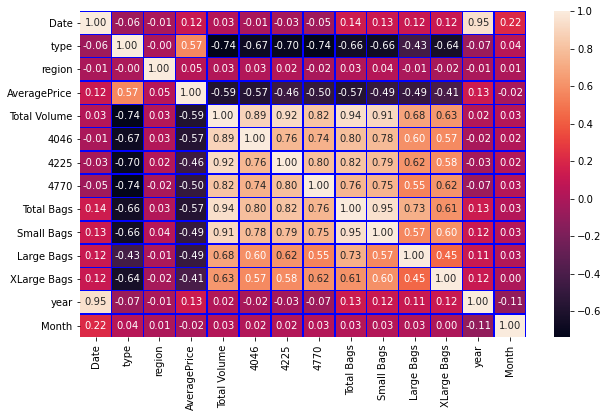

In [54]:
# Visualizing correlation
plt.figure(figsize=(10,6))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

With target AveragePrice, region is least correlated, type is strongly positively correlated and Total volume is highly negatively correlated. Except Date,region and year all the other columns have a good correlation with the target.

Date is highly correlated with year only and has bad correlaton with other columns. type is highly negatively correlated with 'AveragePrice', 'Total Volume', '4046','4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'.
       
Region does not have good correlation with any of the columns. Hence we can drop this column as well.

### Dividing dataset in x and y

In [225]:
x=dff.drop(['AveragePrice','Date'],axis=1)
x

,type,region,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,0,0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-2.382779,-1.210647,1.491383
1,0,0,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-2.382779,-1.210647,1.491383
2,0,0,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-2.382779,-1.210647,1.491383
3,0,0,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-2.382779,-1.210647,1.491383
4,0,0,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-2.382779,-1.210647,1.276081
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,1,3,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-2.382779,1.978707,-1.218907
17647,1,3,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-2.382779,1.978707,-1.640288
17648,1,3,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-2.382779,1.978707,-1.640288
17649,1,4,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-2.382779,1.978707,-1.640288


In [226]:
y=dff['AveragePrice']
y

0       -0.117824
1       -0.064330
2       -1.298865
3       -0.829026
4       -0.253635
           ...   
17646    0.639410
17647    0.826487
17648    1.184324
17649    1.313296
17650    0.615619
Name: AveragePrice, Length: 17651, dtype: float64

In [227]:
print('Orginal dataset shape: ',dff.shape)
print('Shape of data in x : ',x.shape)
print('Shape of data in x : ',y.shape)

Orginal dataset shape:  (17651, 14)
Shape of data in x :  (17651, 12)
Shape of data in x :  (17651,)


### Multicollinearity with VIF

In [228]:
# Importing libraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [229]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,type,4.391559
1,region,2.422693
2,Total Volume,51.616712
3,4046,6.900610
4,4225,11.270420
5,4770,3.588190
6,Total Bags,34.917598
7,Small Bags,16.609305
8,Large Bags,3.468725
9,XLarge Bags,3.745537


Total Volume and Total Bags are having high collinearity with Target and with each other as well. So we can drop any column among these.

In [230]:
# Drop highest collinear column and check multicollinearity
xn=x.drop('Total Volume',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,type,4.259671
1,region,2.407224
2,4046,3.503135
3,4225,4.304433
4,4770,3.587695
5,Total Bags,24.561170
6,Small Bags,16.608676
7,Large Bags,3.423920
8,XLarge Bags,3.721068
9,year,1.446438


Total Bags & Small Bags have high multicolinearity and both have good correlation with target as well.

In [231]:
# Drop highest collinear column and check multicollinearity
xn=xn.drop('Total Bags',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,type,4.259607
1,region,2.407001
2,4046,3.478214
3,4225,4.140165
4,4770,3.587695
5,Small Bags,4.095015
6,Large Bags,1.887248
7,XLarge Bags,3.720681
8,year,1.419665
9,Month,1.054606


Collinearity in data seems fine after removing highly multicollinear column.

### Scaling : Standard Scaler / Min-Max Scaler

In [232]:
# Performing Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(xn)
x1=pd.DataFrame(x1)
x1

,0,1,2,3,4,5,6,7,8,9
0,-0.966511,-1.692013,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.691683,-1.210618,1.491383
1,-0.966511,-1.692013,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.691683,-1.210618,1.491383
2,-0.966511,-1.692013,-0.731776,0.649333,0.023923,-0.374453,-0.758523,-0.691683,-1.210618,1.491383
3,-0.966511,-1.692013,-0.632592,0.468799,-0.121164,-0.510991,-0.699123,-0.691683,-1.210618,1.491383
4,-0.966511,-1.692013,-0.684504,0.262126,-0.110491,-0.490534,-0.607027,-0.691683,-1.210618,1.276081
...,...,...,...,...,...,...,...,...,...,...
17646,1.034649,-1.499921,-0.462066,-0.926028,-1.228986,-0.175753,-0.412401,-0.691683,1.978735,-1.218907
17647,1.034649,-1.499921,-0.618019,-0.670600,-1.228986,-0.331971,-0.484991,-0.691683,1.978735,-1.640288
17648,1.034649,-1.499921,-0.617966,-0.778893,0.445710,-0.313756,-0.950743,-0.691683,1.978735,-1.640288
17649,1.034649,-1.435890,-0.547011,-0.716371,0.445399,-0.250408,-0.916068,-0.691683,1.978735,-1.640288


Scaling is done and difference between the low and high values has been minimized.

### Find best randon state for Train-Test Split

In [233]:
#Importing required libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import time

In [234]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    knn=KNeighborsRegressor()
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predtest=knn.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    #if round(acctrain,2)==round(acctest,2) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  88  Accuracy(Training) :  91.97191707775212  Accuracy(Testing) :  88.10885036180886


Here, testing accuracy is maximum for random state=6. So, lets take 6 as our best random state.

In [235]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=88)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14120, 10)
(3531, 10)
(14120,)
(3531,)


### Finding the best algorithm

In [236]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()

In [237]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtr,knn,rf,ad,gd]
svr_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :
    print(i)
    i.fit(x_train,y_train)
    predtrain=i.predict(x_train)
    predtest=i.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    err1=mean_absolute_error(y_test,predtest)
    err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

LinearRegression()
Accuracy(Training) :  48.56275867553171  Accuracy(Test)  49.37878669814088
mean_absolute_error 0.5620494484396431
mean_squared_error 0.503395104640276


DecisionTreeRegressor()
Accuracy(Training) :  100.0  Accuracy(Test)  77.89113727848196
mean_absolute_error 0.3085590116041235
mean_squared_error 0.219858287410257


KNeighborsRegressor()
Accuracy(Training) :  91.8417547422116  Accuracy(Test)  88.10885036180886
mean_absolute_error 0.247747697455482
mean_squared_error 0.11824976380387481


RandomForestRegressor()
Accuracy(Training) :  98.46971642008492  Accuracy(Test)  89.75165777839034
mean_absolute_error 0.22832718894200651
mean_squared_error 0.10191311050316303


AdaBoostRegressor()
Accuracy(Training) :  59.331372630214176  Accuracy(Test)  58.956696991653715
mean_absolute_error 0.5201945159276528
mean_squared_error 0.40814900443941426


GradientBoostingRegressor()
Accuracy(Training) :  74.66757285289889  Accuracy(Test)  73.03643099707851
mean_absolute_error 0.404651

RandomForestRegressor has the highest accuracy and least error.

### Cross Validation

In [249]:
# Computing cross validation score of all the models
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',np.abs(cross_val_score(i,x1,y,cv=5).mean()))

CV mean of  RandomForestRegressor()  is  0.1277136927155343
CV mean of  AdaBoostRegressor()  is  0.08603879619438175
CV mean of  GradientBoostingRegressor()  is  0.2426482367040988


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['mse', 'mae','poisson'],
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth': [5, 10, None],
              'n_estimators': [5, 10, 15]}

rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

In [242]:
rf=RandomForestRegressor(criterion='mse', max_features='auto', max_depth=None, n_estimators=15)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=r2_score(y_test,pred)
#cv=cross_val_score(rf,x1,y,cv=100).mean()

print('R2_score : ',acc)

R2_score :  0.8846281932613798


Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [243]:
# Saved the model in .pkl file
import pickle
file='avacado_regression.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [244]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8846281932613798

We are getting 89% accuracy with trained model on test data.

In [245]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(3531, 10)
(3531,)


In [246]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion

,Orignal,Predicted
0,-1.012684,-0.846503
1,0.067403,-0.015167
2,-0.392515,-0.156703
3,-0.448957,-0.496117
4,-1.564903,-1.559583
...,...,...
3526,1.764201,1.168974
3527,-0.308811,-0.309028
3528,-0.091019,-0.115017
3529,-1.138237,-1.207787


## Now let's take the Classification Problem with target variable as Region

### Dividing dataset in x and y

In [140]:
x=dff.drop(['region','Date'],axis=1)
x

,type,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-2.382779,-1.210647,1.491383
1,0,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-2.382779,-1.210647,1.491383
2,0,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-2.382779,-1.210647,1.491383
3,0,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-2.382779,-1.210647,1.491383
4,0,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-2.382779,-1.210647,1.276081
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,1,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-2.382779,1.978707,-1.218907
17647,1,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-2.382779,1.978707,-1.640288
17648,1,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-2.382779,1.978707,-1.640288
17649,1,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-2.382779,1.978707,-1.640288


In [141]:
y=dff['region']
y

0        0
1        0
2        0
3        0
4        0
        ..
17646    3
17647    3
17648    3
17649    4
17650    4
Name: region, Length: 17651, dtype: int32

In [142]:
print('Orginal dataset shape: ',dff.shape)
print('Shape of data in x : ',x.shape)
print('Shape of data in x : ',y.shape)

Orginal dataset shape:  (17651, 14)
Shape of data in x :  (17651, 12)
Shape of data in x :  (17651,)


### Multicollinearity with VIF

In [143]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,type,3.850865
1,AveragePrice,2.077484
2,Total Volume,53.781665
3,4046,6.895491
4,4225,12.404906
5,4770,3.500441
6,Total Bags,35.479857
7,Small Bags,17.210349
8,Large Bags,3.477093
9,XLarge Bags,3.319330


Total Volume and Total Bags are having high collinearity with Target and with each other as well. So we can drop any column among these.

In [144]:
# Drop highest collinear column and check multicollinearity
xn=x.drop('Total Volume',axis=1)
calc_vif(xn)

,Variables,VIF Factors
0,type,3.801677
1,AveragePrice,1.981125
2,4046,3.553214
3,4225,4.462315
4,4770,3.499966
5,Total Bags,26.750582
6,Small Bags,17.186572
7,Large Bags,3.420296
8,XLarge Bags,3.289606
9,year,1.516883


Collinearity in data seems fine after removing highly multicollinear column.

### Scaling : Standard Scaler / Min-Max Scaler

In [145]:
# Performing Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=sc.fit_transform(xn)
x2=pd.DataFrame(x2)
x2

,0,1,2,3,4,5,6,7,8,9,10
0,-0.966511,-0.117824,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.691683,-1.210618,1.491383
1,-0.966511,-0.064330,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.691683,-1.210618,1.491383
2,-0.966511,-1.298865,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.691683,-1.210618,1.491383
3,-0.966511,-0.829026,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.691683,-1.210618,1.491383
4,-0.966511,-0.253635,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.691683,-1.210618,1.276081
...,...,...,...,...,...,...,...,...,...,...,...
17646,1.034649,0.639410,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.691683,1.978735,-1.218907
17647,1.034649,0.826487,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.691683,1.978735,-1.640288
17648,1.034649,1.184324,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.691683,1.978735,-1.640288
17649,1.034649,1.313296,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.691683,1.978735,-1.640288


Scaling is done and difference between the low and high values has been minimized.

### Find best random state for Train-Test Split

In [146]:
#Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error

In [147]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predtest=knn.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    if round(acctrain,1)==round(acctest,1) :
        print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Final Best random state :  21  Accuracy(Training) :  86.9769324160259  Accuracy(Testing) :  78.30438066465257


Here, training & testing accuracies are almost same for all random states. So, lets take 21 as our best random state.

In [148]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=21)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14120, 11)
(3531, 11)
(14120,)
(3531,)


In [149]:
y_train.value_counts()

0     280
46    278
10    273
4     272
1     272
2     272
45    269
7     269
21    268
27    268
15    268
22    266
16    265
43    265
34    265
38    265
41    265
39    265
44    264
24    264
12    264
31    264
33    264
8     263
17    262
28    262
52    262
11    261
50    261
48    260
42    260
32    260
37    259
47    259
49    259
36    258
29    258
19    258
23    258
6     258
25    258
20    257
18    257
26    256
40    255
9     253
51    253
5     253
35    253
14    252
3     251
30    248
53    246
13    245
Name: region, dtype: int64

All the values in training set y are balanced so no class imbalance issue exists.

### Finding the best algorithm

In [150]:
# Making instance of classifiers
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()

In [151]:
#Executing all algorithms in a single for loop

algo_list=[dtc,knn,svc,rf,ad]
svc_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svc :
        for j in svc_kernel :
            svc=SVC(kernel=j)
            svc.fit(x_train,y_train)
            pred=svc.predict(x_test)
            acc=accuracy_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svc1=SVC(kernel=j)
        print(svc1)
        svc1.fit(x_train,y_train)
        predtrain=svc1.predict(x_train)
        predtest=svc1.predict(x_test)
        acctrain=accuracy_score(y_train,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    else :
        print(i)
        i.fit(x_train,y_train)
        predtrain=i.predict(x_train)
        predtest=i.predict(x_test)
        acctrain=accuracy_score(y_train,predtrain)
        acctest=accuracy_score(y_test,predtest)
        err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100,' Mean absolute error : ',err)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

DecisionTreeClassifier()
Accuracy(Training) :  100.0  Accuracy(Test)  73.0387992070235  Mean absolute error :  3.4777683375814217
[[47  0  0 ...  0  0  1]
 [ 2 58  1 ...  0  0  0]
 [ 0  2 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  7  1]
 [ 0  0  1 ...  4 45  5]
 [ 4  0  0 ...  1  4 53]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        58
           1       0.82      0.88      0.85        66
           2       0.78      0.77      0.78        66
           3       0.78      0.67      0.72        87
           4       0.63      0.71      0.67        56
           5       0.78      0.71      0.74        73
           6       0.85      0.81      0.83        68
           7       0.70      0.70      0.70        57
           8       0.83      0.84      0.83        63
           9       0.86      0.85      0.86        73
          10       0.73      0.81      0.77        53
          11       0.66      0.78      0.72        65
          1

Accuracy(Training) :  100.0  Accuracy(Test)  87.19909374114981  Mean absolute error :  1.3811951288586803
[[50  1  0 ...  0  0  2]
 [ 1 61  0 ...  0  0  0]
 [ 0  1 62 ...  0  0  0]
 ...
 [ 1  0  0 ... 57  2  0]
 [ 1  0  0 ...  0 57  4]
 [ 2  0  0 ...  0  2 71]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        58
           1       0.85      0.92      0.88        66
           2       0.91      0.94      0.93        66
           3       0.92      0.75      0.82        87
           4       0.79      0.86      0.82        56
           5       0.84      0.85      0.84        73
           6       0.92      0.85      0.89        68
           7       0.85      0.91      0.88        57
           8       0.95      0.89      0.92        63
           9       0.93      0.95      0.94        73
          10       0.88      0.87      0.88        53
          11       0.84      0.95      0.89        65
          12       0.89      0.87  

RandomForestClassifier has the highest accuracy but let's go for cross validation for models with good accuracy score.

In [ ]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x2,y,cv=100,scoring='accuracy').mean())

In [158]:
# Computing cross validation score of better performing models
print('DecisionTreeClassifier() :',cross_val_score(dtc,x2,y,cv=70,scoring='accuracy').mean())
print('KNeighborsClassifier() :',cross_val_score(knn,x2,y,cv=70,scoring='accuracy').mean())
print('RandomForestClassifier() :',cross_val_score(rf,x2,y,cv=70,scoring='accuracy').mean())

DecisionTreeClassifier() : 0.6527266901490504
KNeighborsClassifier() : 0.66886298656485
RandomForestClassifier() : 0.8042218995635145


Looking at difference of accuracy and cv mean, opting for RandomForestClassifier as our best model with accuracy of 87% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [168]:
# Using dfferent parameters for hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample',None],
              'min_samples_leaf':[1,2,3]}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)
GCV.best_params_

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [172]:
rf=RandomForestClassifier(class_weight=None,criterion='gini',max_features='auto',min_samples_leaf=1)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x2,y,cv=70).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8779382611158312  CV mean :  0.801957014689934


#### We are getting model accuracy as 87% and cv mean as 0.85 for both the parameter sets, this shows our model is performing good.

### AUC-ROC Curve

Multiclass format is not supported by AUC-ROC curve.

### Saving the model

In [180]:
# Saved the model in .pkl file
import pickle
file='avacado_classification.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [181]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.870291702067403

In [182]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(3531, 11)
(3531,)


In [185]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted})
conclusion[:30]

,Orignal,Predicted
0,52,52
1,41,41
2,1,1
3,42,42
4,15,15
5,18,18
6,46,52
7,11,11
8,44,44
9,37,37
